In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [170]:
bank=pd.read_csv("C:/Users/admin/Downloads/bank-full.csv",sep = ";")

In [171]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [172]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Data Transformation

In [173]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [174]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

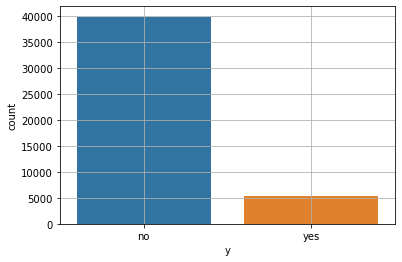

In [175]:
# With the help of countplot we can see the y-values
sns.countplot(bank.y,data=bank)
plt.grid()
plt.show()

In [176]:
no_sub=len(bank[bank['y']=='no'])

In [177]:
no_sub

39922

In [178]:
sub=len(bank[bank['y']=='yes'])

In [179]:
sub

5289

In [180]:
total=no_sub+sub

In [181]:
total

45211

In [182]:
# hence printing how much percentage of sub and no_sub is their

No_sub=(no_sub/total)*100
Sub=(sub/total)*100
print('The percentage of Non_sub is',No_sub)
print('The percentage of Sub is',Sub)

The percentage of Non_sub is 88.30151954170445
The percentage of Sub is 11.698480458295547


In [183]:
# hence using group by method
bank.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [184]:
# hence for categorical data
bank.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


In [185]:
bank.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690


# Data Visulization

Text(0, 0.5, 'Frequency of Purchase')

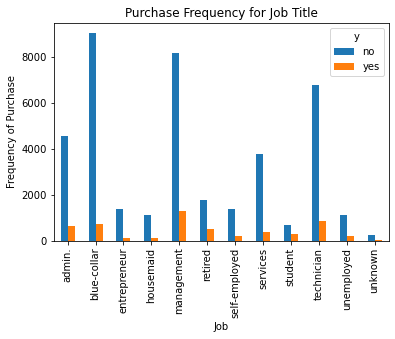

In [186]:
# Hence by using cross tab function we can see the relation between the job and y.
#Job
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

In [ ]:
# As we can see the frequency of purchase of deposit depends on job tile and it acts a good predictor of outcome variable

Text(0, 0.5, 'Proportion of Customers')

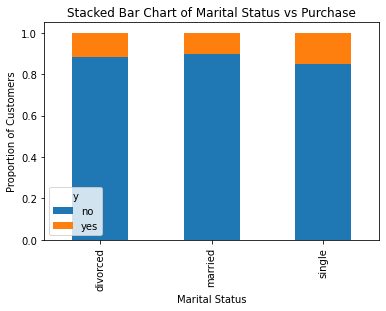

In [188]:
# Marital 
PD=pd.crosstab(bank.marital,bank.y)
PD.div(PD.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

In [ ]:
#The marital status does not seem a strong predictor for the outcome variable.

Text(0.5, 1.0, 'Stacked Bar Chart of Education vs Purchase')

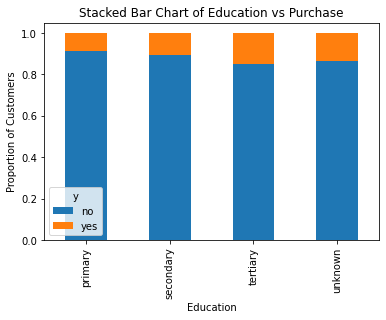

In [189]:
#Education
PD=pd.crosstab(bank.education,bank.y)
PD.div(PD.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.title('Stacked Bar Chart of Education vs Purchase')

In [ ]:
#Education seems a good predictor of the outcome variable.

Text(0.5, 1.0, 'Stacked Bar Chart of Education vs Purchase')

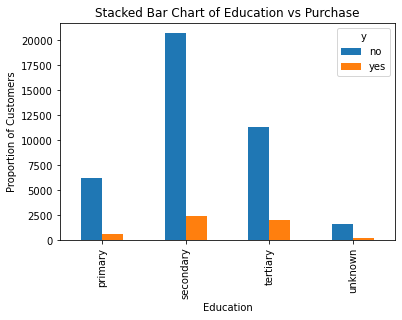

In [190]:
#Education

PD=pd.crosstab(bank.education,bank.y).plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.title('Stacked Bar Chart of Education vs Purchase')

Text(0.5, 1.0, 'Per_Day_Bar')

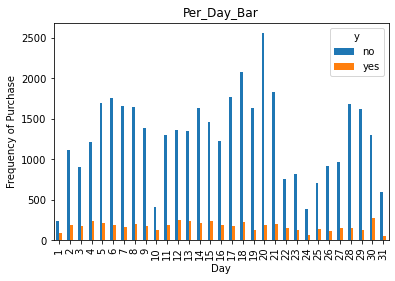

In [191]:
#Day
pd.crosstab(bank.day,bank.y).plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Frequency of Purchase')
plt.title('Per_Day_Bar')

In [ ]:
#Day may not be a good predictor of the outcome.

Text(0.5, 1.0, 'Purchase Frequency for Month')

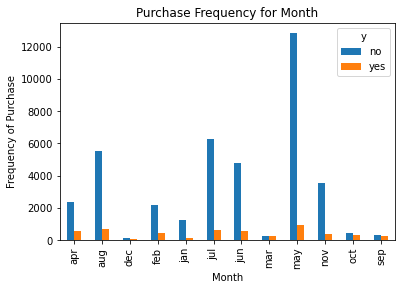

In [192]:
#Month
pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.title('Purchase Frequency for Month')

In [ ]:
#Month might be a good predictor of the outcome variable.

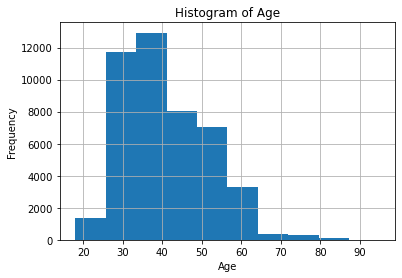

In [193]:
# Histogram with respect to age
plt.hist(bank.age)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()

In [ ]:
# As we can see that most of the customers has a age between 30 to 40.

Text(0, 0.5, 'Frequency of Purchase')

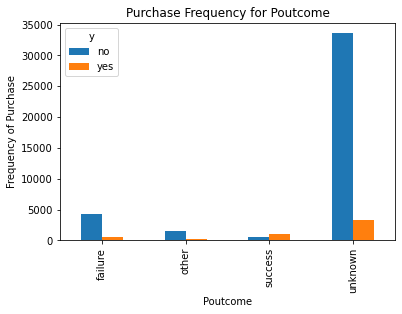

In [194]:
#Poutcome
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

In [ ]:
#Poutcome seems to be a good predictor of the outcome variable.

# Dummy variables 

In [195]:
# hence we will create dummy variable so that only two values will get one and two
Bank_var=pd.get_dummies(bank)

In [196]:
Bank_var.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [197]:
Bank_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_admin.           45211 non-null  uint8
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

In [207]:
# final data var
x=Bank_var.iloc[:,0:51]
y=bank.y

In [211]:
y=bank.y.replace(('yes','no'),(1,0),inplace=True)

In [209]:
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [215]:
bank.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [ ]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(classifier, n_features_to_select= None)
rfe = rfe.fit(x,bank.y)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)


In [228]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False  True False
  True False False  True False False False False  True False  True False
 False False False False  True  True  True False  True  True  True False
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True]
[25 27 24 23 10 26 21 20 12  8  1 17  1 15 14  1 16  3  9 11  1 22  1 13
  4 18 19  5  1  1  1  2  1  1  1  7  1  1  1  1  1  6  1  1  1  1  1  1
  1  1  1]


## Model Building

In [113]:
import statsmodels.api as sm
logit_model = sm.Logit(y, x).fit()
result.summary()

         Current function value: 0.238463
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45168
Method:                           MLE   Df Model:                           42
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                  0.3392
Time:                        21:31:04   Log-Likelihood:                -10781.
converged:                      False   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0001      0.002      0.051      0.959      -0.004       0.004
balance              1.284e-05   5.15e-06      2.493      0.013    2.75e-06    2.29e-05
day                     0.0100      0.002      3.993      0.000       0.005       0.015
duration                0.0042   6.45e-05     64.985      0.000       0.004       0.004
campaign               -0.0908      0.010     -8.955      0.000      -0.111      -0.071
pdays                  -0.0001      0.000     -0.335      0.737      -0.001       0.000
previous                0.0102      0.007      1.561      0.118      -0.003       0.023
job_admin.              0.0678   2.91e+06   2.33e-08      1.000   -5.71e+06    5.71e+06
job_blue-collar        -0.2421   2.97e+06  -8.14e-08      1.000   -5.83e+06    5.83e+06
job_entrepreneur       -0.2893      3e+06  -9.64e-08      1.000   -5.88e+06    5.88e+06
job_housemaid          -0.4362   2.93e+06  -1.49e-07      1.000   -5.73e+06    5.73e+06
job_management         -0.0975   2.94e+06  -3.32e-08      1.000   -5.76e+06    5.76e+06
job_retired             0.3202   2.98e+06   1.08e-07      1.000   -5.84e+06    5.84e+06
job_self-employed      -0.2305    2.9e+06  -7.96e-08      1.000   -5.68e+06    5.68e+06
job_services           -0.1560   3.01e+06  -5.18e-08      1.000    -5.9e+06     5.9e+06
job_student             0.4500   2.87e+06   1.57e-07      1.000   -5.62e+06    5.62e+06
job_technician         -0.1082   2.93e+06  -3.69e-08      1.000   -5.74e+06    5.74e+06
job_unemployed         -0.1089   2.94e+06   -3.7e-08      1.000   -5.76e+06    5.76e+06
job_unknown            -0.2454   2.89e+06   -8.5e-08      1.000   -5.66e+06    5.66e+06
marital_divorced       -0.3297        nan        nan        nan         nan         nan
marital_married        -0.5091        nan        nan        nan         nan         nan
marital_single         -0.2372        nan        nan        nan         nan         nan
education_primary      -0.4722   2.55e+06  -1.85e-07      1.000   -4.99e+06    4.99e+06
education_secondary    -0.2887    2.6e+06  -1.11e-07      1.000    -5.1e+06     5.1e+06
education_tertiary     -0.0933    2.6e+06  -3.59e-08      1.000    -5.1e+06     5.1e+06
education_unknown      -0.2218   2.77e+06  -7.99e-08      1.000   -5.44e+06    5.44e+06
default_no             -0.5297   5.87e+05  -9.02e-07      1.000   -1.15e+06    1.15e+06
default_yes            -0.5464    5.9e+05  -9.26e-07      1.000   -1.16e+06    1.16e+06
housing_no             -0.2003        nan        nan        nan         nan         nan
housing_yes            -0.8757        nan        nan        nan         nan         nan
loan_no                -0.3253   1.37e+06  -2.37e-07      1.000   -2.69e+06    2.69e+06
loan_yes               -0.7507   1.39e+06   -5.4e-07      1.000   -2.73e+06    2.73e+06
contact_cellular        0.2368        nan        nan        nan         nan         nan
contact_telephone       0.0735        nan        nan        nan         n

## Logistic Regression Model Fitting

In [219]:
#Model Building (Logistic Regression)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [129]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [141]:
x_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
24951,58,1021,18,205,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
22129,55,196,21,168,2,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
986,50,159,7,216,2,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
14999,43,1880,17,63,6,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4027,53,647,16,512,6,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,35,995,5,39,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21243,35,750,18,233,12,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42613,35,323,11,261,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
43567,70,616,27,149,2,182,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [142]:
x_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
14001,37,1403,10,91,15,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32046,36,-253,14,1073,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13318,47,-406,8,243,5,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
42991,57,501,11,105,7,188,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14237,33,-406,14,332,2,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,31,0,13,164,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
35730,48,5078,8,139,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
11495,39,4,19,185,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
20975,42,13410,14,149,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [143]:
y_train

24951    0
22129    0
986      0
14999    0
4027     0
        ..
30403    0
21243    0
42613    1
43567    0
2732     0
Name: y, Length: 31647, dtype: int64

In [144]:
y_test

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
2666     0
35730    0
11495    0
20975    0
31975    0
Name: y, Length: 13564, dtype: int64

## Checking Accuracy

In [165]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, x_train, y_train, cv=2)
print('Cross-Validation Accuracy Scores', scores)


Cross-Validation Accuracy Scores [0.89035642 0.89452063]


In [166]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, x_test, y_test, cv=2)
print('Cross-Validation Accuracy Scores', scores)


Cross-Validation Accuracy Scores [0.8901504 0.8904453]
